#**Upload files dataset đã được crawl từ Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1OsVIpwbiJl5vf6OtUWBBoot1Ddaa6sR-"})
downloaded.GetContentFile('new_data-1-1000 (1).json')

#**Đưa vào các thư viện cần thiết**

In [ ]:
!pip install underthesea

     |████████████████████████████████| 7.1MB 2.5MB/s 
     |████████████████████████████████| 1.5MB 41.6MB/s 
     |████████████████████████████████| 460kB 40.5MB/s 
     |████████████████████████████████| 757kB 41.3MB/s 
     |████████████████████████████████| 286kB 37.0MB/s 
     |████████████████████████████████| 5.4MB 45.5MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449904 sha256=726093d86cb168abfa91a83538af2c26770e24b12224fd0a6330984eea67e7a3
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
  Created wheel for clint: filename=clint-0.5.1-cp36-none-any.whl size=34449 sha256=128b3c9e91bb3c3a96c1fddda740aea50f4cab73ea678b500af85be7ea3e108f
  Stored in directory: /root/.cache/pip/wheels/4f/e9/45/223565e5b1a4b09e12c6de6f8ba7c2c0e9127dec17cf830f83
  Created wheel for args: filename=args-0.1.0-cp36-none-any.whl size=3320 sha256=7bbd04521a8b7b3e549ecbd54632ba4e5fb92e1d6250a143da55587f955450f2
  Store

In [ ]:
import pandas as pd
import numpy as np
import re
import underthesea
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

#**Tiến hành đọc dữ liệu từ file sử dụng thư viện pandas**

In [ ]:
dataset = pd.read_json("new_data-1-1000 (1).json", lines = True, encoding = "UTF-8")
dataset.head()

,TYPE,NAME,COMMENT,RATING COMMENT
0,0,iPhone 11 128GB,Sac pin ip11 phần viền kim loại khi đụng vào c...,5
1,-1,iPhone 11 128GB,Mình mua đc 1 tuần mà sao thấy cảm ứng mình lư...,2
2,0,iPhone 11 128GB,Mình mua hôm 20/12 Chụp ngược sáng bị phản chi...,3
3,0,iPhone 11 128GB,"Dùng được 3 ngày, mọi trải nghiệm tuyệt vời, p...",4
4,0,iPhone 11 128GB,Chưa xài lần não hãng này... Nhưng cái 11 này ...,4


In [ ]:
dataset.shape

(3000, 4)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


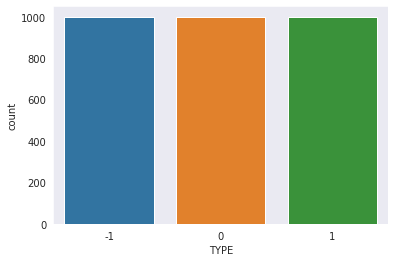

In [ ]:
import seaborn as sns
sns.set_style("dark")
sns.countplot(dataset.TYPE)

In [ ]:
X_data = dataset['COMMENT']
Y_data = dataset['TYPE']

In [ ]:
print(X_data)

0       Sac pin ip11 phần viền kim loại khi đụng vào c...
1       Mình mua đc 1 tuần mà sao thấy cảm ứng mình lư...
2       Mình mua hôm 20/12 Chụp ngược sáng bị phản chi...
3       Dùng được 3 ngày, mọi trải nghiệm tuyệt vời, p...
4       Chưa xài lần não hãng này... Nhưng cái 11 này ...
                              ...                        
2995    mọi thứ đều ổn trừ bạn nhân viên tên Đạt bên T...
2996    mua lại hàng xài rồi nhìn chung cũng tạm được,...
2997    thích hợp để sưu tầm thôi, hoài cỗ nữa nhưng c...
2998    Shop có hỗ trợ đổi trả không admin, mong admin...
2999    Sản phẩm ổn trong tầm giá, không quá cầu kì có...
Name: COMMENT, Length: 3000, dtype: object


#**Tiền xử lý dữ liệu**

**Tiền xử lý dữ liệu, ở đây chúng ta tiến hành các bước như:**


*   Đưa các ký tự về chữ thường
*   Loại bỏ các số
*   Loại bỏ các dấu câu
*   Loại bỏ khoảng trắng thừa
*   Bỏ bớt các chữ cái giống nhau liên tiếp( Vd: quaaa -> qua)
*   Tách từ tiếng Việt sử dụng thư viện underthesea có sẵn
*   Loại bỏ các stopwords tiếng Việt sử dụng bộ stopwords có sẵn lấy từ
*   Chuẩn hóa dữ liệu

In [ ]:
#Đưa về kiểu chữ thường
def text_lowercase(text):
    return text.lower()

re.sub: 1 phương thức có tác dụng so khớp và thay thế chuỗi so khớp được.

Với: r’\d’ tương ứng với bất kỳ chữ số thập phân Unicode nào [0-9].

->	Thay thế các chữ số tìm được bằng ''.


In [ ]:
#Loại bỏ các con số
def remove_number(text):
    result = re.sub(r'\d+', '', text) 
    return result



Dùng hàm .replace có sẵn trong python để thay thế các dấu câu tìm được bằng “ ”.


In [ ]:
#Loại bỏ các dấu câu
def remove_punctuation(text):
    text = text.replace(",", " ").replace(".", " ") \
    .replace(";", " ").replace("“", " ") \
    .replace(":", " ").replace("”", " ") \
    .replace('"', " ").replace("'", " ") \
    .replace("!", " ").replace("?", " ") \
    .replace("-", " ").replace("?", " ")  
    return text

Dùng hàm .split() để chuyển chuỗi text thành một list cắt theo separator (dấu phân tách) – separator để trống mặc định là khoảng cách. 

Sau đó dùng hàm .join() để chuyển list về chuỗi - các phần tử cách nhau bởi một khoảng cách “ ”.


In [ ]:
#Loại bỏ khoảng trắng thừa
def remove_whitespace(text): 
    return  " ".join(text.split())

In [ ]:
# Bỏ bớt các chữ cái giống nhau liên tiếp( Vd: quaaa -> qua)
def remove_similarletter(text):
    text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), text, flags=re.IGNORECASE)
    return text

Thư viện underthesea được phát triển bởi nhóm nghiên cứu xử lý ngôn ngữ tự nhiên tiếng Việt của tác giả chính là Vũ Anh.

In [ ]:
#Tách từ tiếng Việt sử dụng thư viện underthesea có sẵn
def VN_Tokenize(text,format='text'):
  return underthesea.word_tokenize(text)

In [ ]:
print(VN_Tokenize("a lô có ai ở đó không?"))

['a', 'lô', 'có', 'ai', 'ở', 'đó', 'không', '?']


Stopwords là những từ xuất hiện rất nhiều trong các bài viết, các đoạn text nhưng lại không hề liên quan gì đến nội dung và ý nghĩa của bài viết, gây mơ hồ, làm quá trình máy học, phân loại giảm đi độ chính xác.

Trong quá trình tìm kiếm, chúng em thu thập được 1 file vietnamese-stopwords-dash (1).txt chứa một list những từ stopwords Tiếng Việt của tác giả Lê Văn Duyệt và chúng em có tinh chỉnh lại file cho phù hợp với đồ án lần này.


In [ ]:
downloaded1 = drive.CreateFile({'id':"1buHsfg9uC70tuUNe852UBCZxcqFg4re5"})
downloaded1.GetContentFile('vietnamese-stopwords-dash (1).txt')

In [ ]:
#Loại bỏ các stopwords tiếng Việt sử dụng bộ stopwords có sẵn lấy từ
def remove_VN_stopwords(text):
    file_stopwords = pd.read_csv("vietnamese-stopwords-dash (1).txt", encoding = 'UTF-8')
    file_stopwords.columns = ["Stop_words"]

    VN_stopword = []
    for i in file_stopwords["Stop_words"]:
        VN_stopword.append(i)
        
    text_token = VN_Tokenize(text)
    result = [word for word in text_token if word not in VN_stopword]
    return " ".join(result)

Chuẩn hóa dữ liệu là bước chuẩn hóa các từ tuy cách viết khác nhau nhưng cùng mang một nghĩa, người dùng có thể đã sử dụng các từ viết tắt, teencode, tiếng Anh,..., việc chuẩn hóa giúp cho bộ dữ liệu trở nên tốt hơn

Trong lúc thu thập dữ liệu, chúng em thu thập được một dict chứa các teencode, viết tắt,… Trong quá trình xử lí dữ liệu, sẽ thực hiện tìm trong các bình luận nếu chứa các từ giống với key của phần tử trong replace_list  ,ta gán giá trị từ đó bằng value của key tương ứng.

In [ ]:
#Chuẩn hóa dữ liệu
def Util(text):
    replace_list = {
        'ship': 'vận chuyển', 'shop': 'cửa hàng', 'sho': 'cửa hàng', 'm': 'mình','mk':'mình','mjk':'mình', 'mik': 'mình', 'ko': 'không' , 'k': 'không', 'kh': 'không', 'khong': 'không', 'kg': 'không', 'khg': 'không','hok':'không','hong':'không', 'tl': 'trả lời',
        'rep': 'trả lời', 'r': 'rồi', 'fb': 'facebook', 'face': 'faceook', 'thanks': 'cảm ơn', 'thank': 'cảm ơn', 'tks': 'cảm ơn', 'tk': 'cảm ơn', 'ok': 'tốt', 'oki': 'tốt', 'okie': 'tốt', 'sp': 'sản phẩm',
        'dc': 'được','đc':'được','dk':'được', 'vs': 'với', 'đt': 'điện thoại', 'thjk': 'thích', 'thik': 'thích', 'qá': 'quá', 'trể': 'trễ', 'bgjo': 'bao giờ', 'h': 'giờ', 'qa': 'quá', 'dep': 'đẹp', 'xau': 'xấu', 'ib': 'nhắn tin',
        'cute': 'dễ thương', 'sz': 'size', 'good': 'tốt', 'god': 'tốt', 'bt': 'bình thường','tr':'triệu','dag':'đang','nhiu':'nhiêu','mn':'mọi người','m.n':'mọi người','ac':'anh chị','sag':'sang','s':'sao',
        'sz': 'cỡ', 'size': 'cỡ', 'đx': 'được', 'dk': 'được', 'dc': 'được', 'đk': 'được','ae':'anh em','j':'gì','hnay':'hôm nay','lm':'làm','ktra':'kiểm tra','sp':'sản phẩm','zô':'vào',
        'đc': 'được', 'authentic': 'chuẩn chính hãng', 'aut': 'chuẩn chính hãng', 'auth ': 'chuẩn chính hãng', 'thick': 'thích','v':'vậy','cng':'cũng','cg':'cũng','ns':'nói','nv':'nhân viên',
        'gud': 'tốt', 'god': 'tốt', 'wel done': 'tốt', 'good': 'tốt', 'gút': 'tốt','ng':'người','chs':'chơi','mng':'mọi người','wa':'quá',
        'sấu': 'xấu', 'gut': 'tốt', 'tot': 'tốt', 'nice': 'tốt', 'perfect': 'rất tốt','trc':'trước',
        'time': 'thời gian', 'qá': 'quá','nc':'nói chung','ace':'anh chị em',
        'product': 'sản phẩm', 'quality': 'chất lượng', 'chat': 'chất' , 'excelent': 'hoàn hảo', 'bad': 'tệ', 'sad': 'tệ',
        'beautiful': 'đẹp', 'tl': 'trả lời', 'r': 'rồi', 'order': 'đặt hàng',
        'chất lg': 'chất lượng', 'sd': 'sử dụng', 'dt': 'điện thoại', 'nt': 'nhắn tin', 'tl': 'trả lời', 'sài': 'xài', 'bjo': 'bao giờ',
        'thik': 'thích', 'sop': 'cửa hàng', 'fb': 'facebook', 'face': 'facebook', 'very': 'rất',
        'dep': 'đẹp', 'xau': 'xấu','tgdđ':'thế giới di động','tgdd':'thế giới di động','đmx':'điện máy xanh',
        'iu': 'yêu', 'fake': 'giả mạo', 'trl': 'trả lời', '><': 'tiêu cực',
        'por': 'tệ', 'poor': 'tệ', 'ib': 'nhắn tin', 'rep': 'trả lời', 'fback': 'feedback', 'fedback': 'feedback',
        'bin': 'pin', 'cx': 'cũng', 'nch': 'nói chuyện', 'ntn': 'như thế nào', 'vde': 'vấn đề'
    }
    text = text.split()
    len_ = len(text)
    for i in range(0, len_):    
      for k, v in replace_list.items():
        if (text[i]==k):
          text[i] = v
    return " ".join(text)

In [ ]:
print(Util("ship hàng tới đây đê"))

vận chuyển hàng tới đây đê


Sau đó chúng em tổng hợp các hàm về một hàm xử lý dữ liệu (Text_PreProcessing_noutil) để thuận tiện cho việc sử dụng:

In [ ]:
def Text_PreProcessing_noutil(data):
  result_1 = []
  for i in data:
    i = str(i)
    text = text_lowercase(i)
    text = Util(text)
    text = remove_similarletter(text)
    text = remove_number(text)
    text = remove_punctuation(text)
    text = remove_whitespace(text)
    text = remove_VN_stopwords(text)
    result_1.append(text)
  return result_1

In [ ]:
X_data_1 = X_data
Y_data_1 = Y_data

In [ ]:
X_data_1 = Text_PreProcessing_noutil(X_data_1)

In [ ]:
print(X_data_1[0])

sac pin ip viền kim loại đụng cảm giác tê như điện máy lỗi không làm sao khắc phục


#**Trích xuất đặc trưng sử dụng TF-IDF**

TF-IDF (Term Frequency - Inverse Document Frequency):

TF: tần số xuất hiện của 1 từ trong 1 văn bản
IDF: tần số nghịch của 1 từ trong một tập các văn bản
Kỹ thuật TF-IDF dùng để tính toán tần suất xuất hiện của một từ trong văn bản, dựa trên đó để đánh giá mức độ quan trọng của từng từ trong văn bản

Tham khảo: https://codetudau.com/bag-of-words-tf-idf-xu-ly-ngon-ngu-tu-nhien/index.html

TfidfVectorizer dùng để chuyển đổi dữ liệu văn bản sang ma trận các features TF-IDF

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://towardsdatascience.com/how-sklearns-tf-idf-is-different-from-the-standard-tf-idf-275fa582e73d

In [ ]:
vectorizer_1 = TfidfVectorizer()
vectorizer_1.fit(X_data_1)
X_data_tfidf_1 = vectorizer_1.transform(X_data_1).toarray()

In [ ]:
print(vectorizer_1.get_feature_names())

['_i_', '_pin', '_sạc', '_và', 'abonic', 'active', 'ad', 'adapter', 'admin', 'adorable', 'adr', 'adreno', 'adroi', 'adroid', 'ae', 'ag', 'ah', 'ahehehe', 'ahihi', 'ai', 'airpod', 'ak', 'akg', 'al', 'album', 'always', 'am', 'amin', 'amoled', 'amp', 'an', 'and', 'andoi', 'andoid', 'androi', 'android', 'anfai', 'angten', 'anh', 'anker', 'anlpha', 'antutu', 'ao', 'ap', 'apel', 'apk', 'aple', 'ar', 'as', 'atcol', 'athì', 'audio', 'auto', 'avatar', 'avt', 'ba', 'bai', 'bala', 'balo', 'ban', 'bang', 'bao', 'batery', 'bay', 'bc', 'be', 'beat', 'best', 'bgqafy', 'bh', 'bi', 'biet', 'bik', 'bil', 'bin', 'binh', 'binhg', 'bionic', 'bit', 'bixby', 'biên', 'biêt', 'biêtd', 'biêts', 'biến', 'biết', 'biếu', 'biền', 'biển', 'biểu', 'biện', 'biệt', 'bjk', 'bl', 'bla', 'blosom', 'bloutoth', 'bluatoth', 'bluetoth', 'blut', 'blutod', 'blutoth', 'blutut', 'bn', 'bo', 'boi', 'bong', 'bouns', 'box', 'brand', 'bronze', 'bt', 'bth', 'bthan', 'bthuong', 'bua', 'bubg', 'buds', 'buonc', 'burn', 'buôn', 'buồn', 'b

In [ ]:
print(X_data_tfidf_1.shape)

(3000, 3771)


#**Chia bộ dataset và tiến hành train, test, đánh giá các model**

Chia bộ dataset theo tỷ lệ train/test ứng với 80/20

In [ ]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_data_tfidf_1, Y_data_1, test_size=0.2)

#**Train và Test với model SVC**

In [ ]:
model_1 = SVC(kernel='linear')
model_1.fit(X_train_1, Y_train_1)
print("Model SVC")
print("Train score: ", model_1.score(X_train_1, Y_train_1))
print("Test score: ", model_1.score(X_test_1, Y_test_1))

Model SVC
Train score:  0.9079166666666667
Test score:  0.745


Cách tính độ chính xác của model bằng **score** như trên chỉ cho ta biết phần trăm dữ liệu được phân loại đúng mà không chỉ ra được dữ liệu được phân loại như thế nào, nên ta sử dụng một ma trận được gọi là **confusion matrix**

**Confusion matrix** giúp ta có cái nhìn chi tiết hơn trong quá trình chọn lọc model dựa trên tập dữ liệu có sẵn

Bài toán này thuộc loại binary classification (có 2 lớp dữ liệu) nên ta sử dụng phương pháp **True/False Positive/Negative**, ta định nghĩa phương pháp này dựa trên confusion matrix

Tham khảo: https://machinelearningcoban.com/2017/08/31/evaluation/#-truefalse-positivenegative

Để đánh giá chất lượng của model ta sử dụng khái niệm F1-score, khái niệm này dựa trên 2 khái niệm khác là Precision và Recall

**Precision** được định nghĩa là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive (TP + FP) 

    Precision = TP/(TP+FP)

**Recall** được định nghĩa là tỉ lệ số điểm true positive trong số những điểm thực sự là positive (TP + FN)

    Recall = TP/(TP+FN)

**F1-score** là harmonic mean của **precision** và **recall** 
    
    F1-score = 2(precision x recall)/(precision + recall)
    
F1 có giá trị nằm trong nửa khoảng (0;1]. F1 càng cao, bộ phân lớp càng tốt. F1 = 1 khi và chỉ khi cả precision và recall đều bằng 1

In [ ]:
y_pred_1 = model_1.predict(X_test_1)
print("F1 score: ",f1_score(Y_test_1, y_pred_1, average = 'macro'))

F1 score:  0.7447209222834282


Confusion matrix, without normalization
[[159  33   6]
 [ 24 129  31]
 [ 11  48 159]]


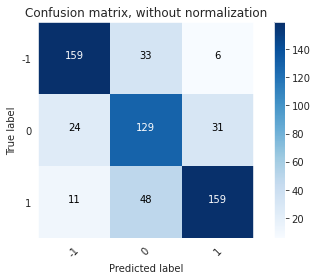

In [ ]:
#đoạn code thể hiện confusion matrix lấy từ : https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python?fbclid=IwAR2gosLkbym_WUq8o9ZgHmOxzn9nZUUfrHN5cLQxWCvZKq9BDLR_qr_f9qA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
  
cnf_matrix = confusion_matrix(Y_test_1, y_pred_1, labels=[-1, 0, 1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[-1, 0, 1],
                      title='Confusion matrix, without normalization')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_1, y_pred_1, target_names=['-1', '0', '1']))

              precision    recall  f1-score   support

          -1       0.82      0.80      0.81       198
           0       0.61      0.70      0.65       184
           1       0.81      0.73      0.77       218

   micro avg       0.74      0.74      0.74       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.75      0.74      0.75       600



***Với các model MultinomialNB, RandomForestClassifier, LogisticRegression:***

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

##***MultinomialNB:***

In [ ]:
modelnb = MultinomialNB()
modelnb.fit(X_train_1, Y_train_1)
print("Model MultinomialNB")
print("Train score: ", modelnb.score(X_train_1, Y_train_1))
print("Test score: ", modelnb.score(X_test_1, Y_test_1))
y_pred_nb = modelnb.predict(X_test_1)
print("F1 score: ",f1_score(Y_test_1, y_pred_nb, average = 'macro'))

Model MultinomialNB
Train score:  0.8495833333333334
Test score:  0.7433333333333333
F1 score:  0.7414419125535217


Confusion matrix, without normalization
[[142  43  13]
 [ 19 128  37]
 [  9  33 176]]


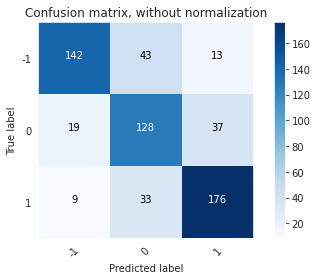

In [ ]:
cnf_matrix_nb = confusion_matrix(Y_test_1, y_pred_nb, labels=[-1, 0, 1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_nb, classes=[-1, 0, 1],
                      title='Confusion matrix, without normalization')

In [ ]:
print(classification_report(Y_test_1, y_pred_nb, target_names=['-1', '0', '1']))

              precision    recall  f1-score   support

          -1       0.84      0.72      0.77       198
           0       0.63      0.70      0.66       184
           1       0.78      0.81      0.79       218

   micro avg       0.74      0.74      0.74       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.75      0.74      0.75       600



##***LogisticRegression:***

In [ ]:
modellr = LogisticRegression()
modellr.fit(X_train_1, Y_train_1)
print("Model LogisticRegression")
print("Train score: ", modellr.score(X_train_1, Y_train_1))
print("Test score: ", modellr.score(X_test_1, Y_test_1))
y_pred_lr = modellr.predict(X_test_1)
print("F1 score: ",f1_score(Y_test_1, y_pred_lr, average = 'macro'))

Model LogisticRegression
Train score:  0.8554166666666667
Test score:  0.735
F1 score:  0.7304342878113371


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion matrix, without normalization
[[163  28   7]
 [ 34 113  37]
 [ 12  41 165]]


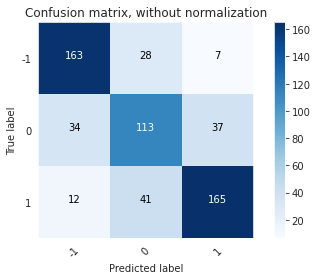

In [ ]:
cnf_matrix_lr = confusion_matrix(Y_test_1, y_pred_lr, labels=[-1, 0, 1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=[-1, 0, 1],
                      title='Confusion matrix, without normalization')

In [ ]:
print(classification_report(Y_test_1, y_pred_lr, target_names=['-1', '0', '1']))

              precision    recall  f1-score   support

          -1       0.78      0.82      0.80       198
           0       0.62      0.61      0.62       184
           1       0.79      0.76      0.77       218

   micro avg       0.73      0.73      0.73       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.73      0.73      0.73       600



##***RandomForestClassifier:***

In [ ]:
modelrdf = RandomForestClassifier(n_estimators=10)
modelrdf.fit(X_train_1, Y_train_1)
print("Model RandomForestClassifier")
print("Train score: ", modelrdf.score(X_train_1, Y_train_1))
print("Test score: ", modelrdf.score(X_test_1, Y_test_1))
y_pred_rdf = modelrdf.predict(X_test_1)
print("F1 score: ",f1_score(Y_test_1, y_pred_rdf, average = 'macro'))

Model RandomForestClassifier
Train score:  0.99125
Test score:  0.65
F1 score:  0.6488799173754572


Confusion matrix, without normalization
[[140  39  19]
 [ 40 107  37]
 [ 16  59 143]]


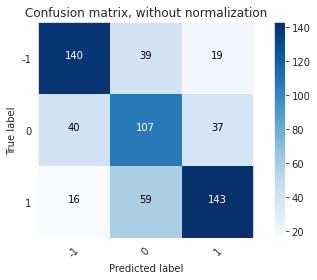

In [ ]:
cnf_matrix_rdf = confusion_matrix(Y_test_1, y_pred_rdf, labels=[-1, 0, 1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_rdf, classes=[-1, 0, 1],
                      title='Confusion matrix, without normalization')

In [ ]:
print(classification_report(Y_test_1, y_pred_rdf, target_names=['-1', '0', '1']))

              precision    recall  f1-score   support

          -1       0.71      0.71      0.71       198
           0       0.52      0.58      0.55       184
           1       0.72      0.66      0.69       218

   micro avg       0.65      0.65      0.65       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.66      0.65      0.65       600



In [ ]:
import joblib
joblib.dump(vectorizer_1, 'tf_idf.pkl')
joblib.dump(model_1, "bestmodel.pkl")

['bestmodel.pkl']